In [11]:
import numpy as np
import sys
import re
import os
import cygnus_lib as cy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line, resize, rescale)
import scipy.ndimage
from skimage.transform import hough_circle, hough_circle_peaks
from scipy.stats import norm
import scipy.stats as stats



import mylib as my

%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']

from itertools import combinations
#######
x_resolution = y_resolution = 2048
########
#x_resolution = y_resolution = 2304

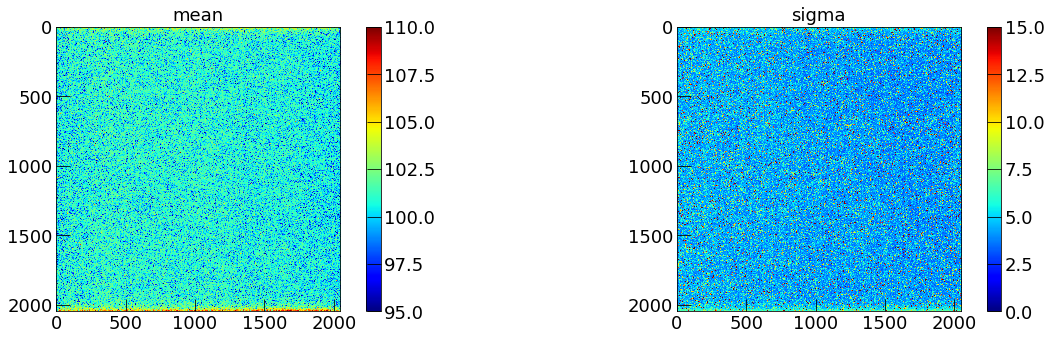

60 109.99497487437186 95.00502512562814
60 100 0.6004022795843108 109.99497487437186 95.00502512562814


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in true_divide


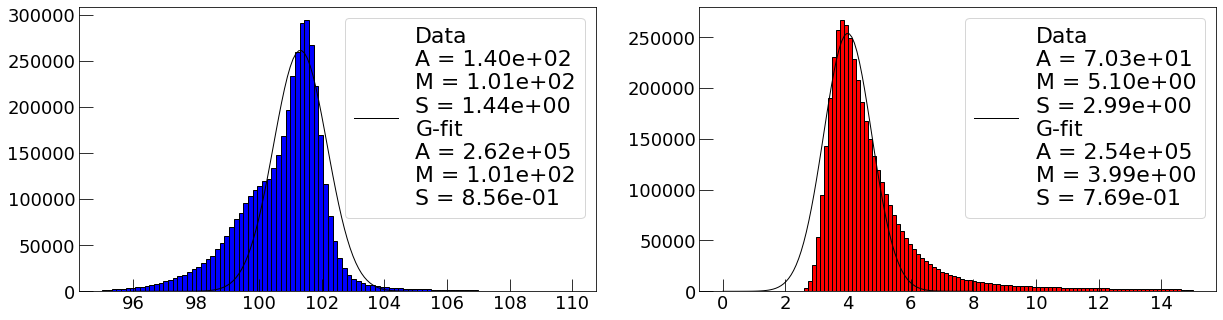

In [53]:
cy.set_atlas_style('long')
run = 2356
try:
    fileoutm = ("./data/run%d_mean.h5" % (run))
    imagem = cy.read_image_h5(fileoutm)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)
try: 
    fileouts = ("./data/run%d_sigma.h5" % (run))
    images = cy.read_image_h5(fileouts)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)


fig, ax = plt.subplots(1,2)
im = ax[0].imshow(imagem, cmap="jet", vmin=95,vmax=110)
fig.colorbar(im, ax=ax[0])
ax[0].set_title("mean")
ax[1].set_title("sigma")
im = ax[1].imshow(images, cmap="jet", vmin=0,vmax=15)
fig.colorbar(im, ax=ax[1])
plt.show()

bins=100
y = imagem.ravel()
y = y[~np.isnan(y)]
A, M, S = y.max(), y.mean(), y.std()
y=y[(y>95) & (y<110.)]

fig, ax = plt.subplots(1,2)
ax[0].hist(y, bins=bins, fc='b', ec='k')
gauss = True
if gauss:
    cmin    = 96.
    cmax    = 105.
    binsf = int(bins*((cmax-cmin)/(y.max()-y.min())))
    print (binsf, y.max(), y.min())
    print (binsf, bins, (cmax-cmin)/(y.max()-y.min()), y.max(), y.min())
    yh, bins_edge = np.histogram(y, bins=binsf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binsf)
    ye      = 1/np.sqrt(yh)
    #ax[0].errorbar(x, yh, ye, fmt="k.")

    popt, pcov = curve_fit(my.Gauss3, x, yh, 
                            sigma=ye,
                            absolute_sigma=True,
                            p0=(y.max(), y.mean(), y.std()))
    xf = np.linspace(cmin, cmax, 100)
    ax[0].plot(xf, my.Gauss3(xf, *popt), 'k-', 
               label='Data\nA = %.2e\nM = %.2e\nS = %.2e\nG-fit\nA = %.2e\nM = %.2e\nS = %.2e' % 
                          (A, M, S, popt[0], popt[1], abs(popt[2])))

y = images.ravel()
y = y[~np.isnan(y)]
A, M, S = y.max(), y.mean(), y.std()
y=y[(y>0) & (y<15)] 

ax[1].hist(y, bins=100, fc='r', ec='k')
if gauss:
    cmin    = 0.
    cmax    = 8.
    binsf = int(bins*((cmax-cmin)/(y.max()-y.min())))
    yh, bins_edge = np.histogram(y, bins=binsf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binsf)
    ye      = 1/np.sqrt(yh)
    #ax[0].errorbar(x, yh, ye, fmt="k.")


    popt, pcov = curve_fit(my.Gauss3, x, yh, 
                            sigma=ye,
                            absolute_sigma=True,
                            p0=(y.max(), y.mean(), y.std()))
    xf = np.linspace(cmin, cmax, 100)
    ax[1].plot(xf, my.Gauss3(xf, *popt), 'k-', 
               label='Data\nA = %.2e\nM = %.2e\nS = %.2e\nG-fit\nA = %.2e\nM = %.2e\nS = %.2e' % 
                          (A, M, S, popt[0], popt[1], abs(popt[2])))
#ax[0].set_yscale("log")
#ax[1].set_yscale("log")
ax[0].legend()
ax[1].legend()
plt.show()

In [38]:
y = images.ravel()
y = y[~np.isnan(y)]
y

array([ 4.12006882,  5.4964812 ,  5.01911773, ...,  3.67653908,
       13.97357082,  3.36667869])

In [39]:
y.max(), y.mean(), y.std()

(35.00024199319424, 3.4894629714699295, 1.3444168408866162)

In [32]:
np.max(y[y!='nan'])

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


nan

In [45]:
y = images.ravel()

In [46]:
y

array([4.15444304, 3.71596785, 4.32238535, ..., 3.30662499, 2.7584088 ,
       2.79496586])